<a href="https://colab.research.google.com/github/Tanmay8275987417/Tanmay-Paliwal-DL-Breast-Cancer-Wisconsin-Datasets-classified-using-ANN/blob/main/Breast_Cancer_datasets_classified_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Breast Cancer Wisconsin Datasets classified using ANN**

In [1]:
# Installing the packages

#!pip install graphviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import keras
from keras.models import Sequential     # Sequential allows you to create models layer-by-layer
from keras.layers import Dense

In [3]:
# Importing the Datasets

from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['data.csv']))
# Dataset is now stored in a Pandas Dataframe

Saving data.csv to data.csv


In [5]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Data Visulization

Benign 357
Malignanat 212


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


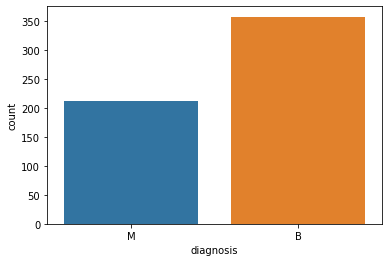

In [6]:
# Visulizing the data  showing the count of Benign and Malignanat 

ax = sns.countplot(data['diagnosis'], label='count')
B,M = data['diagnosis'].value_counts()      
print('Benign', B)
print('Malignanat', M)

## Data Preprocessing

In [7]:
# Deleting the Unnaned:32 column which contain NaN values 
del data['Unnamed: 32']

In [8]:
# Independent and dependent variables 
x = data.iloc[:,2:].values  # Selecting Features
y = data.iloc[:,1].values   # Target Variable

# Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder
labelencoder_x_1 = LabelEncoder()
y = labelencoder_x_1.fit_transform(y)

# Splitting tha dataste into the Training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state =0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [9]:
x_train     # Training data

array([[-0.52787029,  2.49821982, -0.59939466, ..., -1.74713139,
        -0.79044533, -0.91054389],
       [-0.55333608,  0.29431013, -0.60759343, ..., -0.62275667,
        -0.33646358, -0.83551633],
       [ 2.15452653,  0.40392257,  2.26525805, ...,  1.03846122,
        -0.11504791,  0.26488788],
       ...,
       [-1.3297598 , -0.21876938, -1.32088704, ..., -0.98271999,
        -0.718764  , -0.13637062],
       [-1.24940108, -0.24209117, -1.2835826 , ..., -1.74713139,
        -1.58690456, -1.01280367],
       [-0.74291476,  1.08958336, -0.71827692, ..., -0.2865488 ,
        -1.26354211,  0.19486216]])

In [10]:
x_test      # Testing Data

array([[-0.20813312,  0.29431013, -0.13944326, ...,  1.35620942,
         1.08282676,  1.50534354],
       [-0.26189423,  1.39743106, -0.3255555 , ..., -0.83852283,
        -0.73469319, -0.8855347 ],
       [-0.0327021 , -0.83912914, -0.10049907, ..., -0.50397936,
        -1.22531207, -0.92888396],
       ...,
       [-0.47410917,  0.14738282, -0.47600306, ..., -0.59340278,
        -0.35079984, -0.34311323],
       [-0.75423289, -0.7528385 , -0.77976775, ..., -0.75636222,
        -0.08637538,  0.21209071],
       [-0.79667588,  1.82421992, -0.83142005, ..., -1.43195543,
        -0.08956122, -0.71936255]])

## Model Building

In [11]:
# Adding the input and First hidden layer
classifier = Sequential()
classifier.add(Dense(16, kernel_initializer='uniform', activation='relu', input_dim=30))

# Adding the second hidden layer
classifier.add(Dense(16, kernel_initializer='uniform', activation='relu'))

# Adding Output layer
classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [12]:
# Compiling the Model by using Adam Optimiser on Accuracy metrix
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Model Fitting on Training datasets
classifier.fit(x_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
6/6 [==============================] - 14s 3ms/step - loss: 0.6927 - accuracy: 0.5692
Epoch 2/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.6223
Epoch 3/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.6719
Epoch 4/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6820 - accuracy: 0.7487
Epoch 5/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.8603
Epoch 6/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.9022
Epoch 7/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.9176
Epoch 8/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6167 - accuracy: 0.9390
Epoch 9/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5827 - accuracy: 0.9412
Epoch 10/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5396 - accuracy: 0.9378
Epoch 11/150
6/6 [==========

In [17]:
# Evaluate the Model
classifier.evaluate(x_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.0241 - accuracy: 0.9825


[0.02405177801847458, 0.9824561476707458]

In [18]:
# Predicting the test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.7)
y_pred

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False]])

In [ ]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

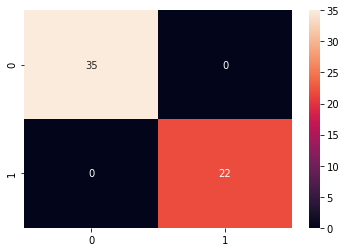

In [ ]:
# Graphical representation of result in the form of confusion Matrix
sns.heatmap(cm,annot=True)
plt.savefig('h.png')